You need to find a chessboard on an image. Once you do you need to figure out where all the pieces are. After that you need to figure out if either king is in check. For maximum points figure out if that check is a checkmate.

In [1]:
You are provided with a path to a folder in a form of <prefix>/<test_case_num> where <test_case_num> is the current test case. The folder's structure is as follows:

<test_case_num>:
│   <test_case_num>.png
│
├───pieces
│   ├───black
│   │       bishop.png
│   │       king.png
│   │       knight.png
│   │       pawn.png
│   │       queen.png
│   │       rook.png
│   │
│   └───white
│           bishop.png
│           king.png
│           knight.png
│           pawn.png
│           queen.png
│           rook.png
│
└───tiles
        black.png
        white.png

SyntaxError: invalid syntax (<ipython-input-1-aea5c79cabc0>, line 1)

0,0 is at the top left corner of the larger picture. From this point if you move down you increase the first coordinate, and if you move to the right you increase the second coordinate.

In [2]:
!pwd

/e/machine_learning/projects/petnica-ml7/checkmate


In [3]:
import os
import PIL
from PIL import Image
import numpy as np

In [4]:
chessboard_dim=8
black_tile_px_val=[180, 136, 102]
white_tile_px_val=[240, 217, 183]
nothing_px_val=[0,0,0]

In [5]:
test_case=0

data_pth=os.path.join('data\\public\set\\',str(test_case))

img_pths={}
img_pths['input']=os.path.join(data_pth,str(test_case)+'.png')

for root, dirs, files in os.walk(data_pth, topdown=False):
    for name in files:
        if not name.split('.')[0].isnumeric():
            desc=os.path.normpath(root).split(os.path.sep)[-1]
            dict_key_name=desc+'_'+name.split('.')[0]
            img_pths[dict_key_name]=os.path.join(root,name)


In [6]:
img_pths

{'input': 'data\\public\\set\\0\\0.png',
 'black_bishop': 'data\\public\\set\\0\\pieces\\black\\bishop.png',
 'black_king': 'data\\public\\set\\0\\pieces\\black\\king.png',
 'black_knight': 'data\\public\\set\\0\\pieces\\black\\knight.png',
 'black_pawn': 'data\\public\\set\\0\\pieces\\black\\pawn.png',
 'black_queen': 'data\\public\\set\\0\\pieces\\black\\queen.png',
 'black_rook': 'data\\public\\set\\0\\pieces\\black\\rook.png',
 'white_bishop': 'data\\public\\set\\0\\pieces\\white\\bishop.png',
 'white_king': 'data\\public\\set\\0\\pieces\\white\\king.png',
 'white_knight': 'data\\public\\set\\0\\pieces\\white\\knight.png',
 'white_pawn': 'data\\public\\set\\0\\pieces\\white\\pawn.png',
 'white_queen': 'data\\public\\set\\0\\pieces\\white\\queen.png',
 'white_rook': 'data\\public\\set\\0\\pieces\\white\\rook.png',
 'tiles_black': 'data\\public\\set\\0\\tiles\\black.png',
 'tiles_white': 'data\\public\\set\\0\\tiles\\white.png'}

In [7]:
a=np.asarray(Image.open(img_pths['input']))

In [8]:
a

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [9]:
a.shape

(514, 425, 3)

In [109]:
def find_beggining(img):
    beggining_found=False
    beggining_position=None
    offset=None
    for row_px in range(img.shape[0]):
        for col_px in range(img.shape[1]):
            position_px_val=img[row_px,col_px,:]
            if np.array_equal(position_px_val,white_tile_px_val) and not beggining_found:
                beggining_position=np.array([row_px,col_px])
                beggining_found=True
            
            if np.array_equal(position_px_val,black_tile_px_val):
                offset=(np.array([row_px,col_px])-beggining_position)[1]
                break
        if beggining_found:
            break
    
#     print(','.join(map(str,beggining_position)))
    return beggining_position, offset
    
img=np.asarray(Image.open(img_pths['input']))
print(find_beggining(img))

(array([140,  62]), 30)


In [11]:
def cut_chessboard(img, begging_position, offset):
    return img[begging_position[0]:begging_position[0]+8*offset,
              begging_position[1]:begging_position[1]+8*offset,
              :]

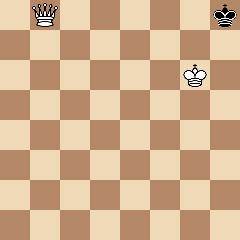

In [12]:
im=Image.fromarray(cut_chessboard(img, [140,62], 30))
im

In [104]:
fig_to_int={
    'bishop':1,
    'king':2,
    'knight':3,
    'pawn':4,
    'queen':5,
    'rook':6
           }

def get_tiles(img, offset):
    
    crops=[]
    for i in range(0,offset*8, offset):
        for j in range(0,offset*8, offset):
            crop=img[i:i+offset,j:j+offset]
            crops.append(crop)
            display(Image.fromarray(crop))
    return crops
crops=get_tiles(cut_chessboard(img,[140,62],30),30)

In [97]:
def get_figure_array(img_pth):
    return np.asarray((Image.open(img_pth).convert('RGB').resize((30,30))))

In [99]:
def get_background_masks(img_pths):
    # in order to neutralize background from image we set the backgroud mask of that figure to 0
    
    background_masks={}
    
    #for background mask extraction color doesnt matter
    background_masks['king']=get_figure_array(img_pths['white_king'])==0
    background_masks['knight']=get_figure_array(img_pths['white_knight'])==0
    background_masks['pawn']=get_figure_array(img_pths['white_pawn'])==0
    background_masks['queen']=get_figure_array(img_pths['white_queen'])==0
    background_masks['rook']=get_figure_array(img_pths['white_rook'])==0         
    background_masks['bishop']=get_figure_array(img_pths['white_bishop'])==0
    return background_masks

background_masks=get_background_masks(img_pths)

In [103]:
# Unit test
white_queen=get_figure_array(img_pths['white_queen'])
white_queen_on_black=crops[1]
display(Image.fromarray(white_queen))
display(Image.fromarray(white_queen_on_black))

queen_background_mask=background_masks['queen']

white_queen_on_black_no_background=white_queen_on_black.copy()
white_queen_on_black_no_background[queen_background_mask]=0
display(Image.fromarray(white_queen_on_black_no_background))

In [119]:
def calculate_match(arr1,arr2):
    return np.sqrt(np.mean((arr1-arr2)**2))

def recognize_figure(tile, background_masks, img_pths):
    display(Image.fromarray(tile))
    min_rmse=10000
    figure_name=None
    
    # finding mask for which the rmse in minimal
    for fig_name, mask in background_masks.items():
        tile_cp=tile.copy()
        tile_cp[mask]=0
        
        
        white_figure_pth=img_pths['white_'+fig_name]
        white_figure=get_figure_array(white_figure_pth)
        
        black_figure_pth=img_pths['black_'+fig_name]
        black_figure=get_figure_array(black_figure_pth)
        
        display(Image.fromarray(tile_cp))
        display(Image.fromarray(black_figure))
        display(Image.fromarray(white_figure))
        
        rmse_white=calculate_match(tile_cp,white_figure)
        rmse_black=calculate_match(tile_cp,black_figure)
        
        print(fig_name)
        print('rmse w ', rmse_white)
        print('rmse b ', rmse_black)
        
        
        if rmse_white<=rmse_black:
            if rmse_white < min_rmse:
                min_rmse=rmse_white
                figure_name='white_'+fig_name
        else:
            if rmse_black < min_rmse:
                min_rmse=rmse_black
                figure_name='black_'+fig_name
                
    return figure_name

recognize_figure(crops[1], background_masks, img_pths)
        

                



king
rmse w  4.903891123194738
rmse b  5.5456021948661


knight
rmse w  5.0351358067675385
rmse b  4.520652198112159


pawn
rmse w  3.9663865447308866
rmse b  2.879171691585903


queen
rmse w  5.196152422706632
rmse b  4.845157949495099


rook
rmse w  4.8530250207321055
rmse b  4.511138478296845


bishop
rmse w  4.556801997502683
rmse b  3.8205584234070633


'black_pawn'

In [114]:
display(Image.fromarray(crops[1]))

In [108]:
def numericalize_chessboard(img, img_pths):
    beggining_position, offset= find_beggining(img)
    chessboard=Image.fromarray(cut_chessboard(img, beggining_position, offset))
    tiles=get_tiles(chessboard, offset)
    background_masks=get_background_masks(img_pths)
    
    chessboard_num=np.zeros((8,8))
    
    for tile in tiles:
        
    
    
    
    
    return 0




img=np.asarray(Image.open(img_pths['input']))
numericalize_chessboard(img, img_pths)

140,62


0

In [110]:
np.zeros((8,8))

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])